In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [32]:

original = "C:/Users/JUAN/Desktop/BOOTCAMP - DATA SCIENCE/Ejercicios Juan/HotelPricePredictor_proyecto_final_ML/data/raw/Hotel Reservations.csv"
df = pd.read_csv(original)
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [34]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [35]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [36]:
features = [
    'no_of_adults',
    'no_of_children',
    'no_of_weekend_nights',
    'no_of_week_nights',
    'type_of_meal_plan',
    'required_car_parking_space', 
    'room_type_reserved',
    'lead_time',
    'arrival_month',
    'market_segment_type',
    'no_of_special_requests'
]

target = 'avg_price_per_room'

#### Análisis de Variables Categóricas

In [37]:
# Hacemos un value_counts de las variables categoricas
categorical_cols = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']
for col in categorical_cols:
    print(f"--- {col} ---")
    print(df[col].value_counts())

--- type_of_meal_plan ---
type_of_meal_plan
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: count, dtype: int64
--- room_type_reserved ---
room_type_reserved
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64
--- market_segment_type ---
market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64
--- booking_status ---
booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64


#### Representación gráfica de distribucion y relación de Variables

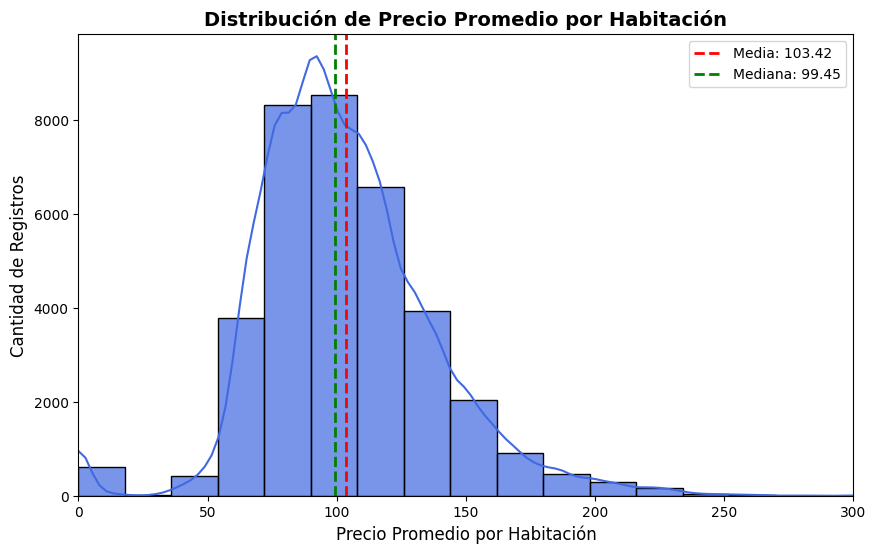

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(10, 6))

# Histograma con KDE
sns.histplot(df['avg_price_per_room'], bins=30, kde=True, color="royalblue", alpha=0.7)

# Calcular media y mediana
media = np.mean(df['avg_price_per_room'])
mediana = np.median(df['avg_price_per_room'])

# Agregar líneas de media y mediana
plt.axvline(media, color='red', linestyle='dashed', linewidth=2, label=f'Media: {media:.2f}')
plt.axvline(mediana, color='green', linestyle='dashed', linewidth=2, label=f'Mediana: {mediana:.2f}')

# Limitar el eje X hasta 300
plt.xlim(0, 300)

# Mejorar títulos y etiquetas
plt.title('Distribución de Precio Promedio por Habitación', fontsize=14, fontweight='bold')
plt.xlabel('Precio Promedio por Habitación', fontsize=12)
plt.ylabel('Cantidad de Registros', fontsize=12)
plt.legend()

plt.show()

In [39]:
print(df['avg_price_per_room'].describe())


count    36275.000000
mean       103.423539
std         35.089424
min          0.000000
25%         80.300000
50%         99.450000
75%        120.000000
max        540.000000
Name: avg_price_per_room, dtype: float64


"avg_price_per_room es el precio promedio por habitación"

🔹 count (36275) → Sobre 36,275 habitaciones registradas

🔹 mean (103.42) → El precio promedio es de $103.42.

🔹 std (35.08) → Los precios tienden a variar aproximadamente ± $35 alrededor del promedio.

🔹 min (0.00) → Precio mínimo encontrado. Puede indicar datos erróneos o promociones especiales de habitaciones gratuitas.

🔹 25% (80.30) → Primer cuartil (Q1). El 25% de las habitaciones tienen un precio igual o menor a 80.30.

🔹 50% (99.45) → Mediana (Q2). El 50% de las habitaciones tienen un precio menor o igual a 99.45. La mediana es una mejor representación del "precio típico" cuando hay valores extremos.

🔹 75% (120.00) → Tercer cuartil (Q3). El 75% de las habitaciones tienen un precio de hasta 120.00.

🔹 max (540.00) → Algunas habitaciones tienen tarifas mucho más altas, lo que puede deberse a suites especiales.




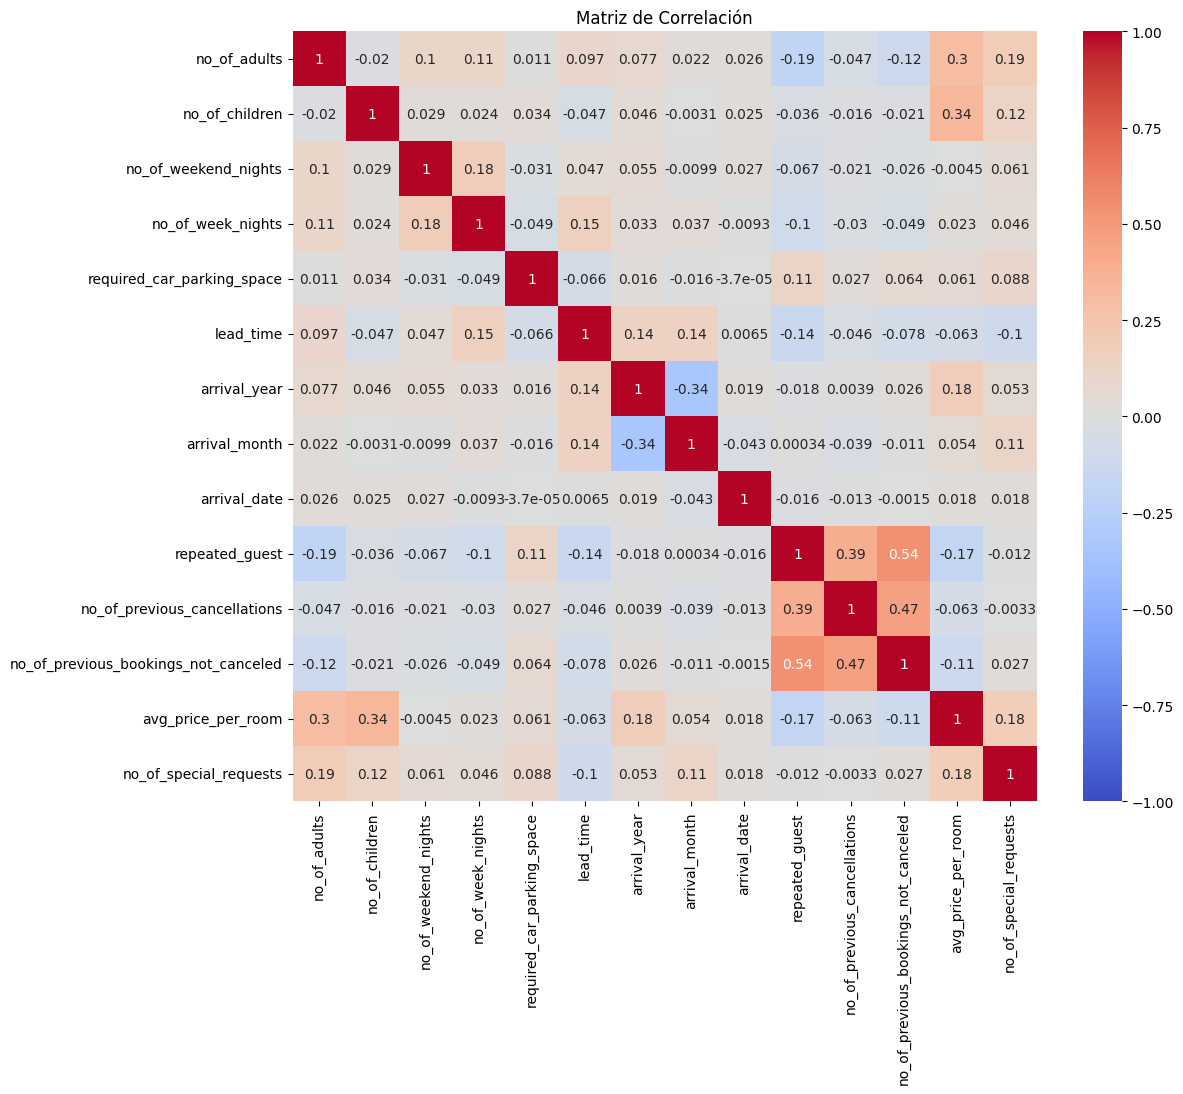

In [ ]:

# Relación entre Variables Numéricas

numeric_cols = df.select_dtypes(include=np.number).columns
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()



#### Limpieza de Datos

In [43]:
# Imputamos valores faltantes (si es necesario)
print("Valores faltantes por columna:")
print(df.isnull().sum())



Valores faltantes por columna:
Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64


In [44]:
# Borramos Duplicados
print("\nNúmero de filas duplicadas:", df.duplicated().sum())
df.drop_duplicates(inplace=True)




Número de filas duplicadas: 0


In [45]:
# Outliers ( avg_price_per_room)

Q1 = df['avg_price_per_room'].quantile(0.25)
Q3 = df['avg_price_per_room'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['avg_price_per_room'] < Q1 - 1.5 * IQR) | (df['avg_price_per_room'] > Q3 + 1.5 * IQR)]
print("\nNúmero de outliers en avg_price_per_room:", len(outliers))



Número de outliers en avg_price_per_room: 1696


In [46]:
# Eliminamos columnas inútiles 
df.drop(columns=['Booking_ID'], inplace=True)

In [47]:
print("\nNúmero de outliers en avg_price_per_room:", len(outliers))


Número de outliers en avg_price_per_room: 1696


### Feature Engineering

#### Codificación de Variables Categóricas

In [48]:
# Hacemos get_dummies para codificar las variables categoricas con las que queremos trabajar

# (Hacemos un drop_first para evitar multicolinealidad)

df = pd.get_dummies(df, columns=['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status'], drop_first=True)

##### Creación de Nuevas Características

In [49]:
# Creamos total_guests y total_nights
df['total_guests'] = df['no_of_adults'] + df['no_of_children']

df['total_nights'] = df['no_of_weekend_nights'] + df['no_of_week_nights']



In [50]:
# Eliminamos las columnas originales si ya no son necesarias
df.drop(columns=['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights'], inplace=True)

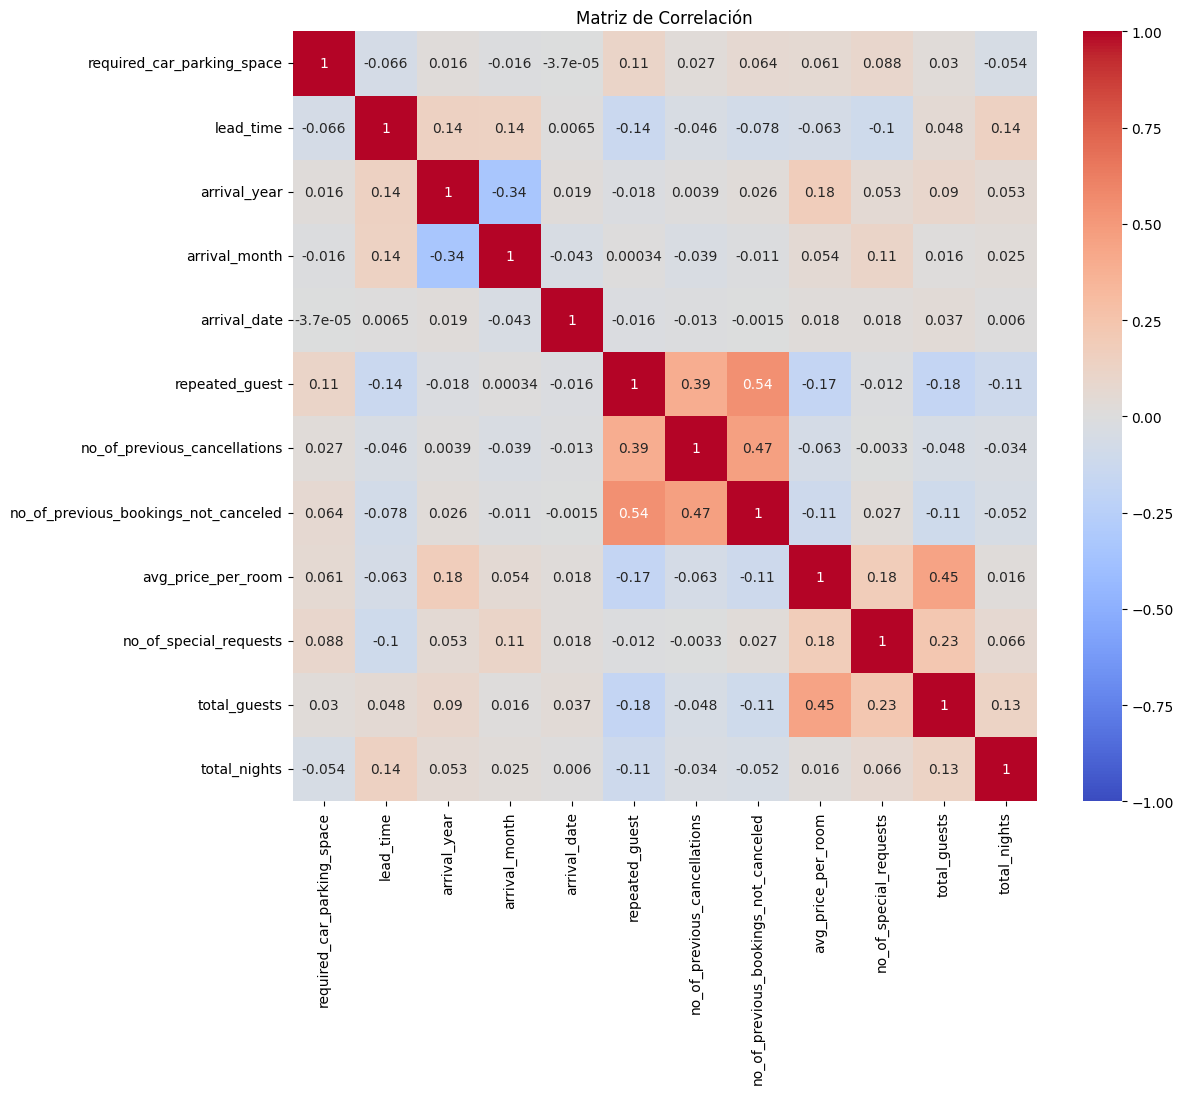

In [ ]:
# Relación entre Variables Numéricas
numeric_cols = df.select_dtypes(include=np.number).columns
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()

In [52]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   required_car_parking_space            36275 non-null  int64  
 1   lead_time                             36275 non-null  int64  
 2   arrival_year                          36275 non-null  int64  
 3   arrival_month                         36275 non-null  int64  
 4   arrival_date                          36275 non-null  int64  
 5   repeated_guest                        36275 non-null  int64  
 6   no_of_previous_cancellations          36275 non-null  int64  
 7   no_of_previous_bookings_not_canceled  36275 non-null  int64  
 8   avg_price_per_room                    36275 non-null  float64
 9   no_of_special_requests                36275 non-null  int64  
 10  type_of_meal_plan_Meal Plan 2         36275 non-null  bool   
 11  type_of_meal_pl

In [54]:
df.to_csv(r'C:\Users\JUAN\Desktop\BOOTCAMP - DATA SCIENCE\Ejercicios Juan\HotelPricePredictor_proyecto_final_ML\data\processed\hotel_reservations_clean.csv', index = False)